# Initial Settings

In [ ]:
!pip install pandas numpy matplotlib seaborn tabulate scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("athletic_dataset.csv")
df.head()

,height_cm,weight_kg,age,activity_level,label
0,175.0,86.8,47,Medium,Sporty
1,168.6,81.1,48,Medium,Sporty
2,176.5,70.7,55,Medium,Sporty
3,185.2,62.2,28,Medium,Sporty
4,167.7,78.4,52,High,Non-Sporty


# Data Preprocessing & Model Training Using Pipeline

In [ ]:
# Features and target
X = df.drop("label", axis=1)
y = df["label"]

# Preprocessing: encode categorical + scale numeric
categorical_cols = ["activity_level"]
numeric_cols = ["height_cm", "weight_kg", "age"]

# Define separate preprocessors for MultinomialNB and other models
preprocessor_mnb = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_cols),
    ("num", MinMaxScaler(), numeric_cols)  # scaled to [0,1]
])

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (RBF Kernel)": SVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Multinomial Naïve Bayesian": MultinomialNB(alpha=0.6),
    "Gaussian Naïve Bayesian": GaussianNB()
}

results = {}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train and evaluate each model
for name, clf in models.items():
    if isinstance(clf, MultinomialNB):
        preprocessor = preprocessor_mnb
    else:
        preprocessor = preprocessor

    model = Pipeline([
        ("preprocess", preprocessor),
        ("clf", clf)
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "y_pred": y_pred  # store predictions
    }


# Evaluation


=== Logistic Regression ===

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Non-Sporty   │        0.97 │     0.99 │       0.98 │    147    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Sporty       │        0.99 │     0.96 │       0.98 │    103    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.98 │     0.98 │       0.98 │      0.98 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.98 │     0.98 │       0.98 │    250    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │        0.98 │     0.98 │       0.98 │    250    │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


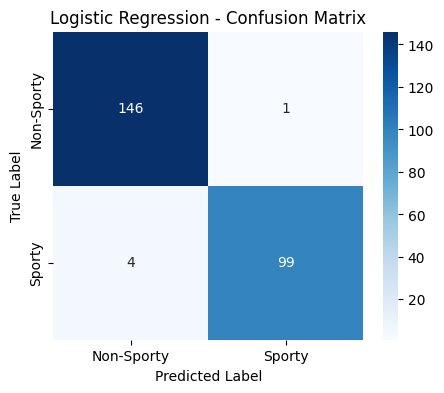


=== SVM (RBF Kernel) ===

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Non-Sporty   │        0.99 │     0.96 │       0.97 │    147    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Sporty       │        0.94 │     0.98 │       0.96 │    103    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.97 │     0.97 │       0.97 │      0.97 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.96 │     0.97 │       0.97 │    250    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │        0.97 │     0.97 │       0.97 │    250    │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


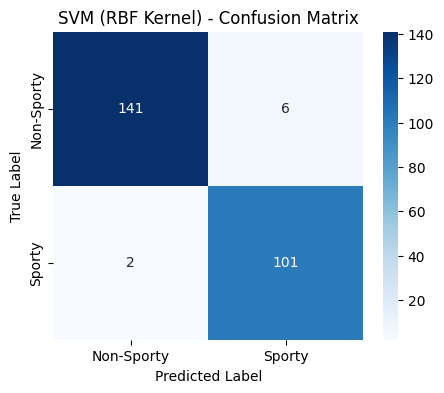


=== Decision Tree ===

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Non-Sporty   │           1 │        1 │          1 │       147 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Sporty       │           1 │        1 │          1 │       103 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │           1 │        1 │          1 │         1 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │           1 │        1 │          1 │       250 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │           1 │        1 │          1 │       250 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


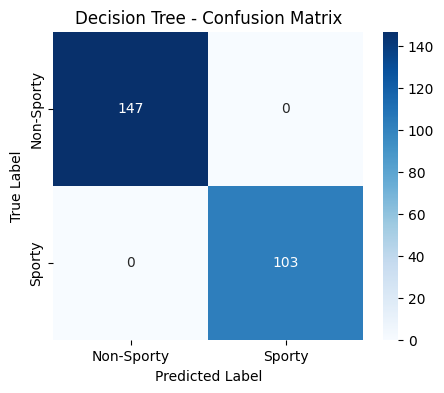


=== MultinomialNB(alpha=0.6) ===

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Non-Sporty   │        0.87 │     0.71 │       0.78 │    147    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Sporty       │        0.67 │     0.84 │       0.75 │    103    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.77 │     0.77 │       0.77 │      0.77 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.77 │     0.78 │       0.77 │    250    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │        0.79 │     0.77 │       0.77 │    250    │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


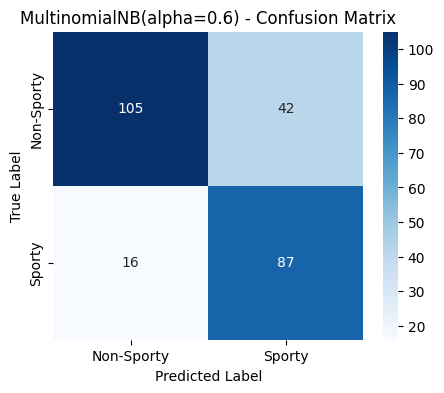


=== GaussianNB() ===

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Non-Sporty   │        1    │     0.54 │       0.7  │    147    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Sporty       │        0.6  │     1    │       0.75 │    103    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.73 │     0.73 │       0.73 │      0.73 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.8  │     0.77 │       0.73 │    250    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │        0.84 │     0.73 │       0.72 │    250    │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


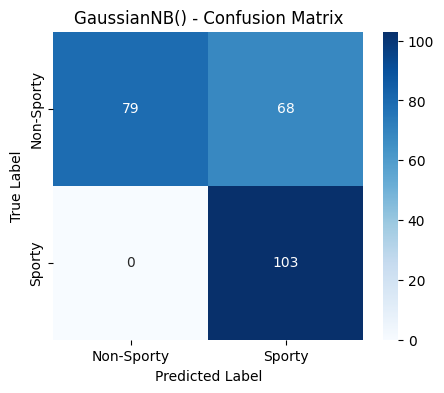

In [4]:
# Print Evaluation metrices for all the models

for name, data in results.items():
    print(f"\n=== {name} ===\n")

    # Convert classification report to DataFrame
    report_dict = classification_report(
        y_test,
        data["y_pred"],   # ensure your predictions are stored
        output_dict=True
    )

    df_report = pd.DataFrame(report_dict).transpose()
    df_report = df_report.round(2)  # round for better readability

    # Print table using tabulate
    print(tabulate(df_report, headers='keys', tablefmt='fancy_grid'))

    # Plot confusion matrix using Seaborn heatmap
    cm = confusion_matrix(y_test, data["y_pred"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Sporty", "Sporty"], yticklabels=["Non-Sporty", "Sporty"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


By analysing the accuracy metrics, we can conclude that the Decision Tree Classifier is the best algorithm for distinguishing targeted labels, while SVM performs better than Logistic Regression and Naive Bayesian.